<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMBD0231ENSkillsNetwork866-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


## Customer Clustering with KMeans to Boost Business Strategy


Estimated time needed: **30** minutes


<p style='color: red'>The purpose of this lab is to show you how to use the KMeans algorithm to cluster customer data.</p>


## __Table of Contents__
<ol>
  <li>
    <a href="#Objectives">Objectives
    </a>
  </li>
  <li>
    <a href="#Datasets">Datasets
    </a>
  </li>
  <li>
    <a href="#Setup">Setup
    </a>
    <ol>
      <li>
        <a href="#Installing-Required-Libraries">Installing Required Libraries
        </a>
      </li>
      <li>
        <a href="#Importing-Required-Libraries">Importing Required Libraries
        </a>
      </li>
    </ol>
  </li>
  <li>
    <a href="#Examples">Examples
    </a>
    <ol>
      <li>
        <a href="#Task-1---Load-the-data-in-a-csv-file-into-a-dataframe">Task 1 - Load the data in a csv file into a dataframe
        </a>
      </li>
      <li>
        <a href="#Task-2---Decide-how-many-clusters-to-create">Task 2 - Decide how many clusters to create
        </a>
      </li>
      <li>
        <a href="#Task-3---Create-a-clustering-model">Task 3 - Create a clustering model
        </a>
      </li>
      <li>
        <a href="#Task-4---Make-Predictions">Task 4 - Make Predictions
        </a>
      </li>        
    </ol>
  </li>

  <li>
    <a href="#Exercises">Exercises
    </a>
  </li>
  <ol>
    <li>
      <a href="#Exercise-1---Load-the-data-in-a-csv-file-into-a-dataframe">Exercise 1 - Load the data in a csv file into a dataframe
      </a>
    </li>
    <li>
      <a href="#Exercise-2---Decide-how-many-clusters-to-create">Exercise 2 - Decide how many clusters to create
      </a>
    </li>
    <li>
      <a href="#Exercise-3---Create-a-clustering-model">Exercise 3 - Create a clustering model
      </a>
    </li>
    <li>
      <a href="#Exercise-4---Make-Predictions">Exercise 4 - Make Predictions
      </a>
    </li>
  </ol>
</ol>














## Objectives

After completing this lab you will be able to:

 - Use Pandas to load data sets.
 - Use K Means algorithm to cluter the data.



## Datasets

In this lab you will be using dataset(s):

 - Modified version of Wholesale customers dataset. Original dataset available at https://archive.ics.uci.edu/ml/datasets/Wholesale+customers 
 - Seeds dataset. Available at https://archive.ics.uci.edu/ml/datasets/seeds
 


## Setup


For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for machine learning and machine-learning-pipeline related functions.


### Installing Required Libraries

The following required libraries are pre-installed in the Skills Network Labs environment. However, if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda), you will need to install these libraries by removing the `#` sign before `!pip` in the code cell below.


In [2]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
!python3 -m pip install pandas
!python3 -m pip install scikit-learn


The following required libraries are __not__ pre-installed in the Skills Network Labs environment. __You will need to run the following cell__ to install them:


In [ ]:
#None

### Importing Required Libraries

_We recommend you import all required libraries in one place (here):_


In [3]:
# You can also use this section to suppress warnings generated by your code:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

## Clustering demo with generated sample data


In [4]:
# Generate sample data for clustering
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)

# X now contains 300 rows of data spread across 4 clusters that was generated by the make_blobs function.
# In real life we would use an existing data set.

In [5]:
X

array([[ 8.36856841e-01,  2.13635938e+00],
       [-1.41365810e+00,  7.40962324e+00],
       [ 1.15521298e+00,  5.09961887e+00],
       [-1.01861632e+00,  7.81491465e+00],
       [ 1.27135141e+00,  1.89254207e+00],
       [ 3.43761754e+00,  2.61654166e-01],
       [-1.80822253e+00,  1.59701749e+00],
       [ 1.41372442e+00,  4.38117707e+00],
       [-2.04932168e-01,  8.43209665e+00],
       [-7.11099611e-01,  8.66043846e+00],
       [-1.71237268e+00,  2.77780226e+00],
       [-2.67000792e+00,  8.35389140e+00],
       [ 1.24258802e+00,  4.50399192e+00],
       [-2.22783649e+00,  6.89479938e+00],
       [ 1.45513831e+00, -2.91989981e-02],
       [ 4.53791789e-01,  3.95647753e+00],
       [ 1.06923853e+00,  4.53068484e+00],
       [ 2.56936589e+00,  5.07048304e-01],
       [-1.06690610e+00,  3.13165795e+00],
       [-1.07859101e+00,  2.20451529e+00],
       [ 2.71506328e+00,  1.29082190e+00],
       [ 1.77710994e+00,  1.18655254e+00],
       [ 7.34363910e-01,  5.03725437e+00],
       [-1.

In [6]:
# Apply k-means clustering
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

KMeans(n_clusters=4)

In [10]:
# Print cluster centers
kmeans.cluster_centers_

array([[ 0.94973532,  4.41906906],
       [-1.37324398,  7.75368871],
       [ 1.98258281,  0.86771314],
       [-1.58438467,  2.83081263]])

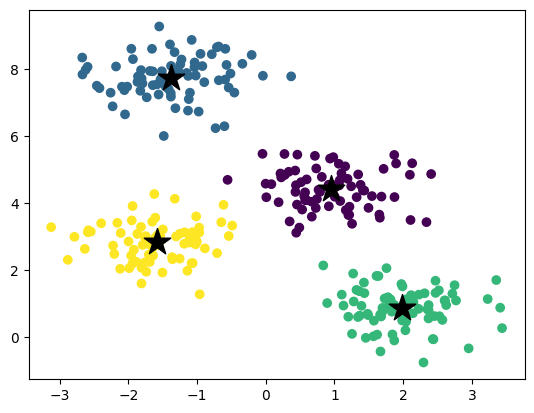

In [8]:
# Plot the clusters and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', s=400, color='black')
plt.show()

End of Demo


# Examples


## Task 1 - Load the data in a csv file into a dataframe


In [11]:
# the data set is available at the url below.
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-BD0231EN-SkillsNetwork/datasets/customers.csv"

# using the read_csv function in the pandas library, we load the data into a dataframe.

df = pd.read_csv(URL)

Let's look at some sample rows from the dataset we loaded:


In [12]:
# show 5 random rows from the dataset
df.sample(5)

,Fresh_Food,Milk,Grocery,Frozen_Food
104,14100,2132,3445,1336
296,19087,1304,3643,3045
147,9203,3373,2707,1286
131,2101,589,314,346
236,8635,820,3047,2312


Let's find out the number of rows and columns in the dataset:


In [13]:
df.shape

(440, 4)

Let's plot the histograms of all columns


array([[<AxesSubplot:title={'center':'Fresh_Food'}>,
        <AxesSubplot:title={'center':'Milk'}>],
       [<AxesSubplot:title={'center':'Grocery'}>,
        <AxesSubplot:title={'center':'Frozen_Food'}>]], dtype=object)

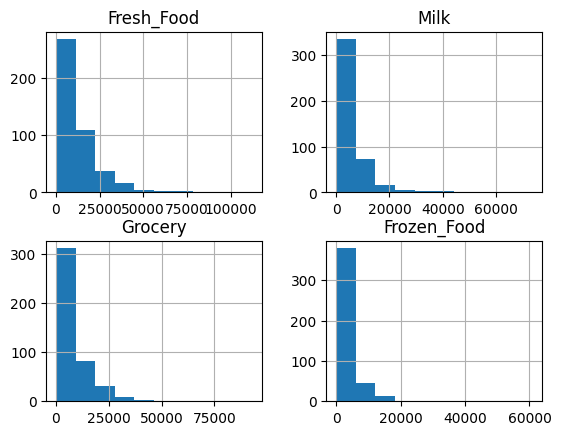

In [14]:
df.hist()

## Task 2 - Decide how many clusters to create


You must tell the KMeans algorithm how many clusters to create out of your data


In [15]:
number_of_clusters = 3

## Task 3 - Create a clustering model


Create a KMeans clustering model


In [16]:
cluster = KMeans(n_clusters = number_of_clusters)

Train the model on the dataset


In [17]:
result = cluster.fit_transform(df)

Your model is now trained. Print cluster centers


In [18]:
cluster.cluster_centers_

array([[ 9167.81818182, 20714.84090909, 28770.        ,  2978.59090909],
       [ 7575.13975155,  3971.17701863,  5608.09937888,  2517.82919255],
       [32939.89189189,  4867.36486486,  5768.56756757,  5538.52702703]])

## Task 4 - Make Predictions


Make the predictions and save them into the column "cluster_number"


In [19]:
df['cluster_number'] = cluster.predict(df)

In [20]:
df.sample(5)

,Fresh_Food,Milk,Grocery,Frozen_Food,cluster_number
97,403,254,610,774,1
176,45640,6958,6536,7368,2
41,19176,3065,5956,2033,1
277,9061,829,683,16919,1
133,9434,1042,1235,436,1


Print the cluster numbers and the number of customers in each cluster


In [21]:
df.cluster_number.value_counts()

1    322
2     74
0     44
Name: cluster_number, dtype: int64

# Exercises


### Exercise 1 - Load the data in a csv file into a dataframe


In [22]:
URL2 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-BD0231EN-SkillsNetwork/datasets/seeds.csv"


Load the seeds dataset available at URL2


In [23]:
df2 = pd.read_csv(URL2)

<details>
    <summary>Click here for a Hint</summary>
    
Use the read_csv function

</details>


<details>
    <summary>Click here for Solution</summary>

```python
df2 = pd.read_csv(URL2)
```

</details>


### Exercise 2 - Decide how many clusters to create


Cluster the data into 4 clusters


In [24]:
number_of_clusters = 4

<details>
    <summary>Click here for a Hint</summary>
    
set the variable number_of_clusters
</details>


<details>
    <summary>Click here for Solution</summary>

```python
number_of_clusters = 4
```

</details>


### Exercise 3 - Create a clustering model


Create a clustering model and train it using the data in the dataframe


In [28]:
cluster = KMeans(n_clusters=number_of_clusters)
result = cluster.fit_transform(df2)

<details>
    <summary>Click here for a Hint</summary>
    
use the fit_transform of KMeans
</details>


<details>
    <summary>Click here for Solution</summary>

```python
cluster = KMeans(n_clusters = number_of_clusters)
result = cluster.fit_transform(df2)
```

</details>


In [29]:
print(cluster.cluster_centers_)

[[19.15104167 16.46916667  0.88708958  6.26885417  3.7729375   3.46041667
   6.12725   ]
 [11.91861111 13.25680556  0.85122222  5.225625    2.86531944  4.8855
   5.08747222]
 [16.40806452 15.31935484  0.87826452  5.86396774  3.46332258  3.85009677
   5.69045161]
 [14.10067797 14.19559322  0.87822373  5.47557627  3.21254237  2.37005424
   5.06584746]]


### Exercise 4 - Make Predictions


Make the predictions and save them into the column "cluster_number"


In [30]:
df2['cluster_number'] = cluster.predict(df2)

<details>
    <summary>Click here for a Hint</summary>
    
use cluster.predict
</details>


<details>
    <summary>Click here for Solution</summary>

```python
df2['cluster_number'] = cluster.predict(df2)

```

</details>


In [31]:
df2.sample(5)

,area,perimeter,compactness,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove,cluster_number
71,16.84,15.67,0.8623,5.998,3.484,4.675,5.877,2
182,12.19,13.36,0.8579,5.240,2.909,4.857,5.158,1
125,18.75,16.18,0.8999,6.111,3.869,4.188,5.992,0
96,19.31,16.59,0.8815,6.341,3.810,3.477,6.238,0
136,17.36,15.76,0.8785,6.145,3.574,3.526,5.971,2


Print the cluster numbers and the number of seeds in each cluster


In [32]:
df2.cluster_number.value_counts()

1    72
3    59
0    48
2    31
Name: cluster_number, dtype: int64

<details>
    <summary>Click here for a Hint</summary>
    
use the value_counts() method on cluster_number column
</details>


<details>
    <summary>Click here for Solution</summary>

```python
df2.cluster_number.value_counts()

```

</details>


Congratulations you have completed this lab.<br>


## Authors


[Ramesh Sannareddy](https://www.linkedin.com/in/rsannareddy/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMBD0231ENSkillsNetwork866-2023-01-01)


## Contributors
[Vicky Kuo](https://author.skills.network/instructors/vicky_kuo?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMBD0231ENSkillsNetwork866-2023-01-01)


## Change Log


|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-04-14|0.1|Ramesh Sannareddy|Initial Version Created|
|2023-06-20|0.3|Vicky Kuo|Proofreading|


Copyright © 2023 IBM Corporation. All rights reserved.
